In [3]:
#Datos sorteos loteria primitiva
import pandas as pd

antiguos = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTov1BuA0nkVGTS48arpPFkc9cG7B40Xi3BfY6iqcWTrMwCBg5b50-WwvnvaR6mxvFHbDBtYFKg5IsJ/pub?gid=0&single=true&output=csv")
modernos = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTov1BuA0nkVGTS48arpPFkc9cG7B40Xi3BfY6iqcWTrMwCBg5b50-WwvnvaR6mxvFHbDBtYFKg5IsJ/pub?gid=1&single=true&output=csv")
sorteos = pd.concat([antiguos,modernos])
sorteos.rename(columns={"COMBINACIÓN GANADORA": "N1","Unnamed: 2": "N2","Unnamed: 3": "N3","Unnamed: 4": "N4","Unnamed: 5": "N5","Unnamed: 6": "N6"},inplace=True)
sorteos.drop(columns={"JOKER","R."},inplace=True)
#Entendemos que si el primer numero de un sorteo no existe es por que no ha habido sorteo, aun que se podriamos comprobar tambien los demas de ser necesario
sorteos = sorteos[sorteos["N1"].notna()]

#sorteos.isna().sum()


,FECHA,N1,N2,N3,N4,N5,N6,COMP.
0,29/12/2012,2.0,3.0,7.0,10.0,21.0,38.0,12.0
1,27/12/2012,2.0,5.0,31.0,33.0,43.0,49.0,47.0
2,22/12/2012,2.0,27.0,29.0,34.0,35.0,40.0,48.0
3,20/12/2012,12.0,21.0,22.0,36.0,47.0,49.0,38.0
4,15/12/2012,4.0,8.0,34.0,36.0,37.0,44.0,14.0


CAMBIAMOS LOS TIPOS DE LAS COLUMNAS

In [15]:
sorteos["FECHA"] = pd.to_datetime(sorteos["FECHA"],dayfirst=True)
sorteos["N1"] = sorteos["N1"].astype(int)
sorteos["N2"] = sorteos["N2"].astype(int)
sorteos["N3"] = sorteos["N3"].astype(int)
sorteos["N4"] = sorteos["N4"].astype(int)
sorteos["N5"] = sorteos["N5"].astype(int)
sorteos["N6"] = sorteos["N6"].astype(int)
sorteos["COMP."] = sorteos["COMP."].astype(int)
#sorteos.dtypes

In [16]:
valores_repetidos_1 = sorteos['N1'].value_counts()
valores_repetidos_2 = sorteos['N2'].value_counts()
valores_repetidos_3 = sorteos['N3'].value_counts()
valores_repetidos_4 = sorteos['N4'].value_counts()
valores_repetidos_5 = sorteos['N5'].value_counts()
valores_repetidos_6 = sorteos['N6'].value_counts()
valores_repetidos_comp = sorteos['COMP.'].value_counts()
print(type(valores_repetidos_1))
      
apariciones_num = pd.concat([valores_repetidos_1,valores_repetidos_2,valores_repetidos_3,valores_repetidos_4,valores_repetidos_5,valores_repetidos_6,valores_repetidos_comp], axis=1, sort=True).sum(axis=1)
apariciones_num = apariciones_num.astype(int)
apariciones_num=apariciones_num.sort_values(ascending=False)
apariciones_num = pd.DataFrame(apariciones_num)
print("Estos son los 10 numeros que mas ha salido en los soretos:")
for i in range(0,11):
    
    print(f"El numero {apariciones_num.index[i]} ha salido un total de {apariciones_num.values[i]}")
    

<class 'pandas.core.series.Series'>
Estos son los 10 numeros que mas ha salido en los soretos:
El numero 3 ha salido un total de [578]
El numero 1 ha salido un total de [571]
El numero 38 ha salido un total de [569]
El numero 11 ha salido un total de [566]
El numero 45 ha salido un total de [566]
El numero 47 ha salido un total de [564]
El numero 40 ha salido un total de [561]
El numero 39 ha salido un total de [559]
El numero 29 ha salido un total de [559]
El numero 32 ha salido un total de [557]
El numero 41 ha salido un total de [557]


Text(0.5, 1.0, 'Numeros mas extrtaidos')

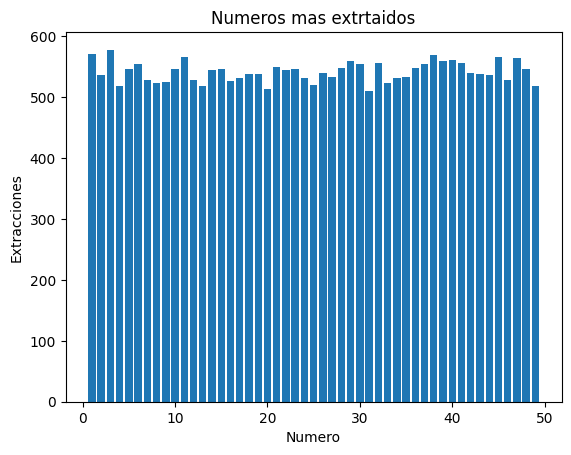

In [5]:
import matplotlib.pyplot as plt
plt.bar(apariciones_num.index,apariciones_num.values)
plt.xlabel("Numero")
plt.ylabel("Extracciones")
plt.title("Numeros mas extrtaidos")